<a href="https://colab.research.google.com/github/jjlee6496/one-by-one/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제1 : 의미상 nominal 인 column 만 count 하기

In [2]:
import pandas as pd
import seaborn as sns

titanic= sns.load_dataset("titanic")
titanic.to_csv("titanic.csv", index=False) 

for c in [x for x in titanic.columns if titanic[x].dtype != 'float64']:
    print(titanic[c].value_counts)

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object>
<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: sibsp, Length: 891, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: parch, Length: 891, dtype: int64>
<bound method IndexOpsMixin

# 과제2 : fare 의 통계적 outlier를 구하여 filtering ( outlier인 값만 출력) 하시오

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

titanic= sns.load_dataset("titanic")
titanic.to_csv("titanic.csv", index=False)

IQR = titanic.fare.quantile(0.75)-titanic.fare.quantile(0.25)
lbound = titanic.fare.quantile(0.25)-IQR*1.5
ubound = titanic.fare.quantile(0.75)+IQR*1.5

In [24]:
titanic[titanic.fare>ubound].fare, titanic[titanic.fare<lbound].fare #lowerbound 보다 작은 값은 없음

(1       71.2833
 27     263.0000
 31     146.5208
 34      82.1708
 52      76.7292
          ...   
 846     69.5500
 849     89.1042
 856    164.8667
 863     69.5500
 879     83.1583
 Name: fare, Length: 116, dtype: float64,
 Series([], Name: fare, dtype: float64))

# 과제3 : numeric column 들의 boxplot을 한 그림에 그리시오

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic= sns.load_dataset("titanic")
titanic.to_csv("titanic.csv", index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


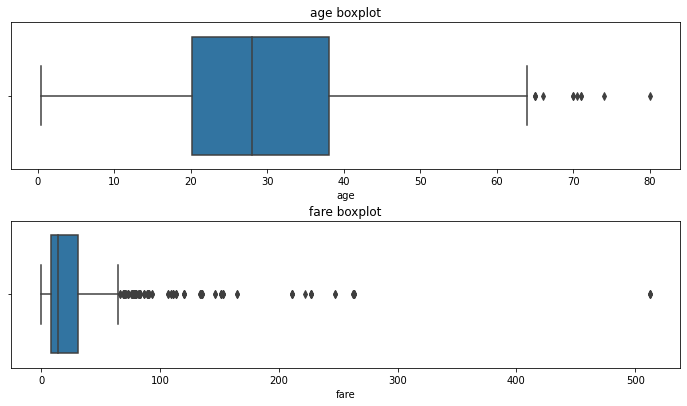

In [60]:
plt.figure(figsize=[12,6]) #figure size
plt.subplots_adjust(left=0.125, bottom=0.1, top=0.9, hspace=0.35) #subplot끼리 겹치지 않도록 간격 조정

plt.subplot(2,1,1)
sns.boxplot(titanic.age)
plt.title('age boxplot')
plt.xlabel('age')
plt.ylabel('')

plt.subplot(2,1,2)
sns.boxplot(titanic.fare)
plt.title('fare boxplot')
plt.xlabel('fare')
plt.ylabel('')

plt.show()

# 과제4 : fare 를 0.99 로 상단처리 ( 더 큰 값은 0.99 quantile 값으로 대체)하시오

In [64]:
import pandas as pd
import seaborn as sns
titanic= sns.load_dataset("titanic")
titanic.to_csv("titanic.csv", index=False)

In [62]:
titanic[titanic['fare']>titanic['fare'].quantile(0.99)]#변경전

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False


In [63]:
titanic['fare'] = titanic['fare'].clip(0,titanic['fare'].quantile(0.99)) # fare 값을 (0,quantile(0.99))범위로 clipping
titanic[titanic['fare']>titanic['fare'].quantile(0.99)] #변경후

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,249.00622,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,249.00622,S,First,woman,False,C,Southampton,yes,False
258,1,1,female,35.0,0,0,249.00622,C,First,woman,False,NaN,Cherbourg,yes,True
311,1,1,female,18.0,2,2,249.00622,C,First,woman,False,B,Cherbourg,yes,False
341,1,1,female,24.0,3,2,249.00622,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,249.00622,S,First,man,True,C,Southampton,no,False
679,1,1,male,36.0,0,1,249.00622,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,249.00622,C,First,man,True,B,Cherbourg,yes,True
742,1,1,female,21.0,2,2,249.00622,C,First,woman,False,B,Cherbourg,yes,False


# 과제 5 : 출발지가 Southampton 과 Cherbourg 만 있다고 가정하고 data cleansing 하시오

In [65]:
import pandas as pd
import seaborn as sns
titanic= sns.load_dataset("titanic")
titanic.to_csv("titanic.csv", index=False)

In [66]:
pd.Categorical ( titanic.embarked, categories=["S", "C"]).unique()

['S', 'C', NaN]
Categories (2, object): ['S', 'C']

# 과제 6 : 여객선 들의 승객의 출발 도시의 차이가 통계적으로 유의한 수준인지 타이타닉 데이터를 통해 판정하시오

In [68]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
from scipy.stats import chisquare

titanic= sns.load_dataset("titanic")
titanic.to_csv("titanic.csv", index=False)

num_embarked=titanic["embarked"].value_counts()

print(num_embarked)
print(chisquare(num_embarked))

S    644
C    168
Q     77
Name: embarked, dtype: int64
Power_divergenceResult(statistic=625.8110236220473, pvalue=1.2789773792558722e-136)


pvalue=1.2789773792558722e-136 으로 매우작다.  
따라서 출발 도시의 차이가 통계적으로 유의한 수준이라고 할 수 있다.